In [2]:
%pip install geopandas
import pandas as pd
import geopandas as gpd

# Load GeoJSON data
small_areas_gdf = gpd.read_file('/workspaces/Datathon_2024/data/smasvaedi/smasvaedi_2021.json')
city_lane_gdf = gpd.read_file('/workspaces/Datathon_2024/data/geojson_files/cityline_2025.geojson')

# Load CSV data
employed_df = pd.read_csv('/workspaces/Datathon_2024/data/num_of_people_working/fjoldi_starfandi.csv')
income_decile_df = pd.read_csv('data/income_data/tekjutiundir.csv')
population_df = pd.read_csv('/workspaces/Datathon_2024/data/num_of_residents/ibuafjoldi.csv')
dwellings_df = pd.read_csv('data/dwellings/ibudir.csv')
construction_sites_df = pd.read_csv('/workspaces/Datathon_2024/data/hms_lodir/lodir.csv')  #wait for new data



Note: you may need to restart the kernel to use updated packages.


In [4]:
# Inspect GeoJSON data

# Filter rows where nuts3 is '001'
smasvaedi_filtered = small_areas_gdf[small_areas_gdf['nuts3'] == '001']

# Select the necessary columns
smasvaedi_filtered = smasvaedi_filtered[['smsv', 'smsv_label_en', 'geometry']]


#change smsv to int
smasvaedi_filtered['smsv'] = smasvaedi_filtered['smsv'].astype(str)
#change label to string
smasvaedi_filtered['smsv_label_en'] = smasvaedi_filtered['smsv_label_en'].astype(str)

"""
#check data types for each column
print(smasvaedi_filtered.dtypes)

#count no. of rows and columns
print(smasvaedi_filtered.shape)
"""
print(smasvaedi_filtered.head())


#get all the unique smsv values and save them in an array
smsv_arr = smasvaedi_filtered['smsv'].unique()

# Create a new list with the additional numbers
new_numbers =['0020' ,'0035', '0018', '0022', '0013' ,'0034', '0033' ,'0026' ,'0048' ,'0186','0019' , '0011' ,'0042', '0039', '0053' ,'0024', '0176', '0004', '0192','0060', '0028', '0043' ,'0037']

# Convert smsv_arr to a list
smsv_arr = smsv_arr.tolist()

# Extend the smsv_arr list with the new numbers (more efficient than append for large lists)
smsv_arr.extend(new_numbers)





print(len(smsv_arr))
print(smsv_arr)






   smsv                       smsv_label_en  \
0  0101  Reykjavik: Vesturbaer north - 0101   
1  0102  Reykjavik: Vesturbaer north - 0102   
2  0103  Reykjavik: Vesturbaer north - 0103   
3  0104  Reykjavik: Vesturbaer north - 0104   
7  0201  Reykjavik: Vesturbaer south - 0201   

                                            geometry  
0  MULTIPOLYGON (((356204.443 408197.924, 356217....  
1  MULTIPOLYGON (((356523.332 407783.774, 356533....  
2  MULTIPOLYGON (((356658.757 408339.946, 356717....  
3  MULTIPOLYGON (((356665.091 408598.411, 356750....  
7  MULTIPOLYGON (((356370.487 405776.517, 356396....  
155
['0101', '0102', '0103', '0104', '0201', '0202', '0203', '0204', '0205', '0206', '0301', '0302', '0501', '0303', '0304', '0401', '0402', '0403', '0404', '0405', '0502', '0503', '0504', '0601', '0602', '1402', '0604', '0606', '0701', '0702', '0703', '0704', '0706', '0707', '0708', '0801', '0802', '0803', '0804', '0805', '0806', '0807', '1203', '0901', '0902', '0903', '0904', '1705'

In [ ]:
print(city_lane_gdf.
#check each column and its data type
print(city_lane_gdf.dtypes)

   id       name line                          geometry
0   1  Vatnsendi  red   POINT (-2427839.86 9371544.592)
1   2      Salir  red  POINT (-2431634.466 9372554.641)
2   3     Lindir  red  POINT (-2434649.232 9374913.131)
3   4  Smáralind  red  POINT (-2436330.938 9375856.527)
4   5  Hamraborg  red   POINT (-2438828.887 9378030.44)
id             int32
name          object
line          object
geometry    geometry
dtype: object


In [123]:
# Rename 'smasvaedi' to 'smsv' if not already done
employed_df.rename(columns={'smasvaedi': 'smsv'}, inplace=True)

#change smsv to int
employed_df['smsv'] = employed_df['smsv'].astype(str).str.zfill(4)



# Inspect CSV data
print(employed_df.head())

#check each column and its data type
print(employed_df.dtypes)

#check if smsv values from employed_df are in smsv_arr  if not then filter them out
employed_df = employed_df[employed_df['smsv'].isin(smsv_arr)]




     ar  smsv  fjoldi
0  2008  0101     752
1  2008  0102     536
2  2008  0103     701
3  2008  0104     491
4  2008  0201     495
ar         int64
smsv      object
fjoldi     int64
dtype: object


In [101]:
#change column name from smasvaedi to smsv
income_decile_df.rename(columns={'smasvaedi': 'smsv'}, inplace=True)

#change smsv to int
income_decile_df['smsv'] = income_decile_df['smsv'].astype(str).str.zfill(4)

#check if smsv values from income_decile_df are in smsv_arr  if not then filter them out
income_decile_df = income_decile_df[income_decile_df['smsv'].isin(smsv_arr)]

print(income_decile_df.head())





     ar  smsv  tekjutiund  fjoldi
0  2008  0101           1      71
1  2008  0101           2      54
2  2008  0101           3      57
3  2008  0101           4      69
4  2008  0101           5      65


In [102]:


#rename column name from smasvaedi to smsv
population_df.rename(columns={'smasvaedi': 'smsv'}, inplace=True)

population_df['smsv'] = population_df['smsv'].astype(str).str.zfill(4)

#check if smsv values from population_df are in smsv_arr  if not then filter them out
population_df = population_df[population_df['smsv'].isin(smsv_arr)]

#len of population_df
print(len(population_df))

print(population_df.head())

#check each column and its data type
print(population_df.dtypes)


83414
     ar  smsv  kyn aldursflokkur  fjoldi
0  2011  0103    1       0-4 ára      38
2  2014  0303    2       0-4 ára      40
4  2010  2004    1       0-4 ára      59
5  2009  1202    1       0-4 ára     123
6  2019  1005    1       0-4 ára      38
ar                int64
smsv             object
kyn               int64
aldursflokkur    object
fjoldi            int64
dtype: object


In [104]:
dwellings_df = pd.read_csv('data/dwellings/ibudir.csv')
# Ensure 'smasvaedi' is treated as a string, then remove the '.0' suffix
dwellings_df['smasvaedi'] = dwellings_df['smasvaedi'].astype(str).str.replace('.0', '', regex=False)

dwellings_df['smasvaedi'] = dwellings_df['smasvaedi'].astype(str).str.zfill(4)



#convert staerdarflokkur , fjherb and fjöldi to int
dwellings_df['staerdarflokkur'] = dwellings_df['staerdarflokkur'].astype(int)
dwellings_df['fjherb'] = dwellings_df['fjherb'].astype(int)


dwellings_df['fjoldi'] = dwellings_df['fjoldi'].astype(int)

#rename column name from smasvaedi to smsv
dwellings_df.rename(columns={'smasvaedi': 'smsv'}, inplace=True)

#delete column 'svfnr' , 'fjherb' 
dwellings_df.drop(['svfnr'], axis=1, inplace=True)

#print len
print(len(dwellings_df))

#check if smsv values from dwellings_df are in smsv_arr  if not then filter them out
dwellings_df = dwellings_df[dwellings_df['smsv'].isin(smsv_arr)]


#print len
print(len(dwellings_df))


print(dwellings_df.head())

#check each column and its data type
print(dwellings_df.dtypes)



4312
967
     smsv  staerdarflokkur  fjherb  framvinda  fjoldi
107  0004                1       0  Ófullbúið       1
108  0004                1       1  Ófullbúið       1
109  0004                1       1   Fullbúið      56
110  0004                1       2  Ófullbúið       4
111  0004                1       2   Fullbúið      40
smsv               object
staerdarflokkur     int64
fjherb              int64
framvinda          object
fjoldi              int64
dtype: object


In [110]:
construction_sites_df = pd.read_csv('/workspaces/Datathon_2024/data/hms_lodir/lodir.csv')

#rename column name from Smásvaædi to smsv
construction_sites_df.rename(columns={'Smásvæði': 'smsv'}, inplace=True)

#print len before
print(len(construction_sites_df))

#Ensure 'smasvaedi' is treated as a string, then remove the '.0' suffix
construction_sites_df['smsv'] = construction_sites_df['smsv'].astype(str).str.replace('.0', '', regex=False)

construction_sites_df['smsv'] = construction_sites_df['smsv'].astype(str).str.zfill(4)




#filter out smsv values that are not in smsv_arr
construction_sites_df = construction_sites_df[construction_sites_df['smsv'].isin(smsv_arr)]



#delete column Sveitarfélag , Athugasemdir
construction_sites_df.drop(['Sveitarfélag', 'Athugasemdir'], axis=1, inplace=True)

print(len(construction_sites_df))

print(construction_sites_df.head())


197
49
  Tegundlóða                     Lóðasvæði                       Staða  smsv  \
0   Fjölbýli               Borgartún 34-36            Byggingarhæf lóð  0020   
1   Fjölbýli         Breiðholt - Suðurfell  Þróunar- og framtíðarsvæði  0035   
2   Fjölbýli                   Guðrúnartún  Þróunar- og framtíðarsvæði  0020   
3   Fjölbýli  Heklureitur - Laugavegur 168            Byggingarhæf lóð  0018   
4   Fjölbýli    Laugardalur - Borgartún 41            Byggingarhæf lóð  0022   

    2023  2024   2025  2026  2027  2028  2029  2030  2031   2032   2033  \
0    0.0   0.0   51.0  51.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1    0.0   0.0  125.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2    0.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0  100.0  100.0   
3   80.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4  115.0   0.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0   

   Samtals  
0    102.0  
1    125.0  
2    200.0  
3     80.

In [117]:
# General overview of datasets
print(employed_df.describe())




                ar       fjoldi
count  2244.000000  2244.000000
mean   2016.000000   827.509358
std       4.900071   283.118407
min    2008.000000    11.000000
25%    2012.000000   631.750000
50%    2016.000000   826.000000
75%    2020.000000  1010.000000
max    2024.000000  2256.000000


In [118]:
print(income_decile_df.describe())

                 ar    tekjutiund        fjoldi
count  22436.000000  22436.000000  22436.000000
mean    2016.001426      5.499822     82.765689
std        4.898361      2.872501     34.080974
min     2008.000000      1.000000      1.000000
25%     2012.000000      3.000000     58.000000
50%     2016.000000      5.000000     80.000000
75%     2020.000000      8.000000    104.000000
max     2024.000000     10.000000    363.000000


In [113]:
print(population_df.describe())


                 ar          kyn        fjoldi
count  83414.000000  83414.00000  83414.000000
mean    2016.047738      1.50169     43.500084
std        4.893945      0.50000     27.310654
min     2008.000000      1.00000      1.000000
25%     2012.000000      1.00000     23.000000
50%     2016.000000      2.00000     42.000000
75%     2020.000000      2.00000     61.000000
max     2024.000000      2.00000    346.000000


In [115]:
print(dwellings_df.describe())


       staerdarflokkur      fjherb      fjoldi
count       967.000000  967.000000  967.000000
mean          4.076525    4.357808   27.290589
std           1.662626    3.921618   47.511068
min           1.000000    0.000000    1.000000
25%           3.000000    2.000000    2.000000
50%           4.000000    4.000000    8.000000
75%           6.000000    6.000000   30.000000
max           6.000000   63.000000  374.000000


In [116]:
print(construction_sites_df.describe())

             2023        2024        2025        2026        2027        2028  \
count   49.000000   49.000000   49.000000   49.000000   49.000000   49.000000   
mean     6.367347   20.408163   20.102041   12.632653   16.081633   12.306122   
std     24.276784   40.606813   38.769750   24.859349   37.832326   34.574319   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000   15.000000   15.000000   10.000000    0.000000    0.000000   
max    115.000000  145.000000  125.000000  113.000000  200.000000  200.000000   

            2029        2030        2031        2032        2033     Samtals  
count   49.00000   49.000000   49.000000   49.000000   49.000000   49.000000  
mean     9.55102   11.183673    8.632653    9.142857    7.204082  133.612245  
std     24.13250   27.346293   24

243414


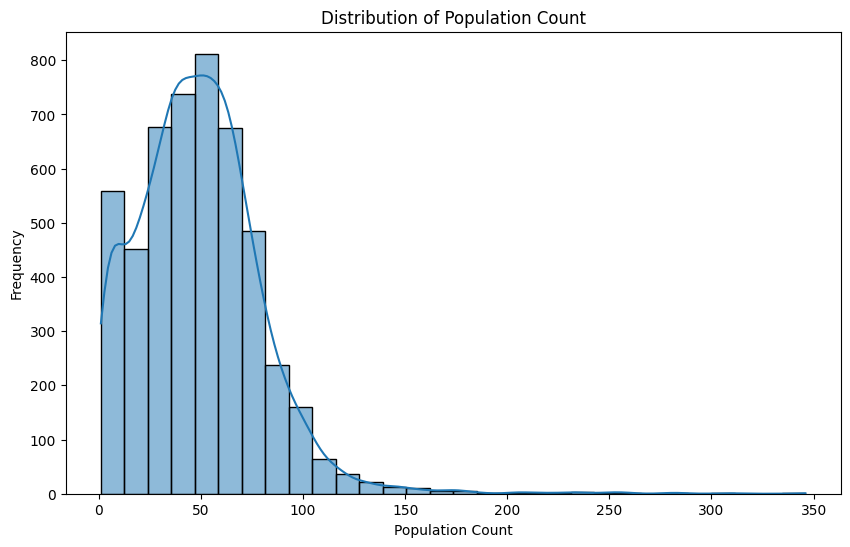

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

#copy of population_df 
population_df_copy = population_df.copy()

#filter ar 2024 only
population_df_copy = population_df_copy[population_df_copy['ar'] == 2024]

#filter out smsv values that are not in smsv_arr
population_df_copy = population_df_copy[population_df_copy['smsv'].isin(smsv_arr)]


#total sum of population count
total_population = population_df_copy['fjoldi'].sum()

print(total_population) #prints 243414



# do a distribution of population count
plt.figure(figsize=(10, 6))
sns.histplot(population_df_copy['fjoldi'], bins=30, kde=True)
plt.title('Distribution of Population Count')
plt.xlabel('Population Count')
plt.ylabel('Frequency')
plt.show()



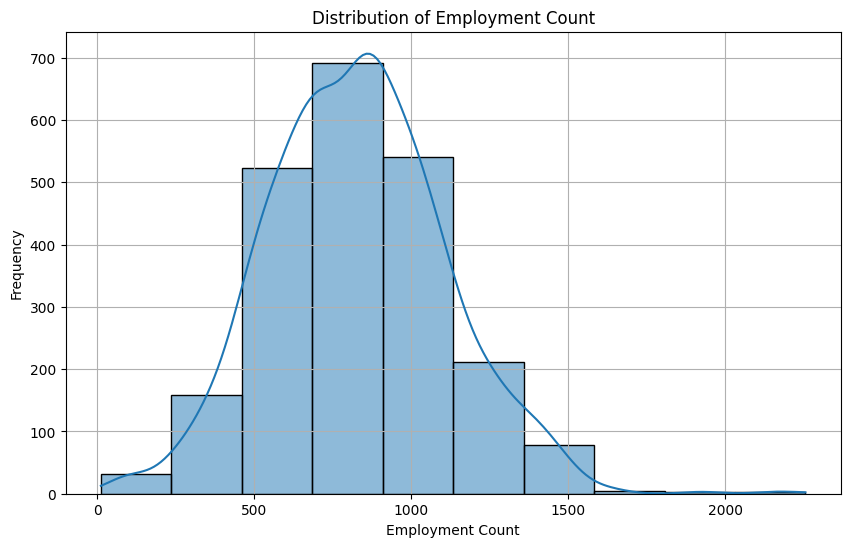

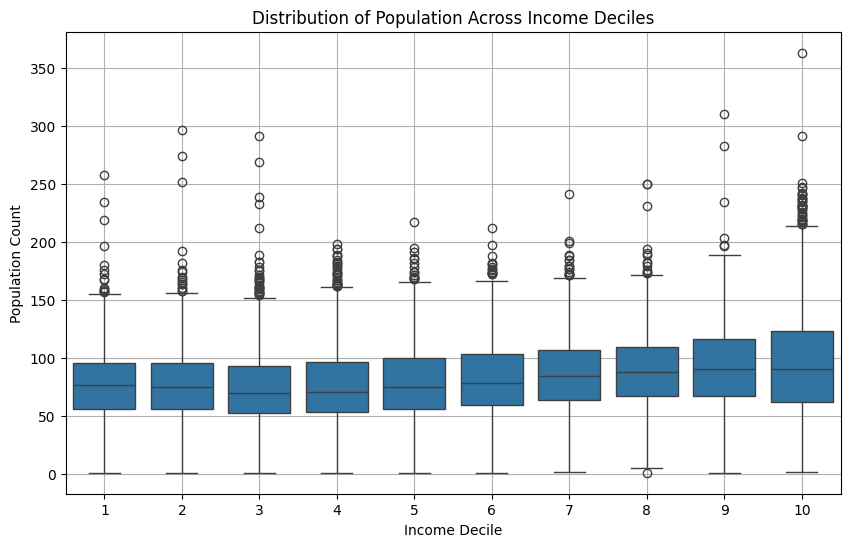

In [124]:
# Visualization of employed distribution
plt.figure(figsize=(10, 6))
sns.histplot(employed_df['fjoldi'], kde=True, bins=10)
plt.title('Distribution of Employment Count')
plt.xlabel('Employment Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualization of income decile distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=income_decile_df, x='tekjutiund', y='fjoldi')
plt.title('Distribution of Population Across Income Deciles')
plt.xlabel('Income Decile')
plt.ylabel('Population Count')
plt.grid(True)
plt.show()